Model Accuracy: 93.33%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



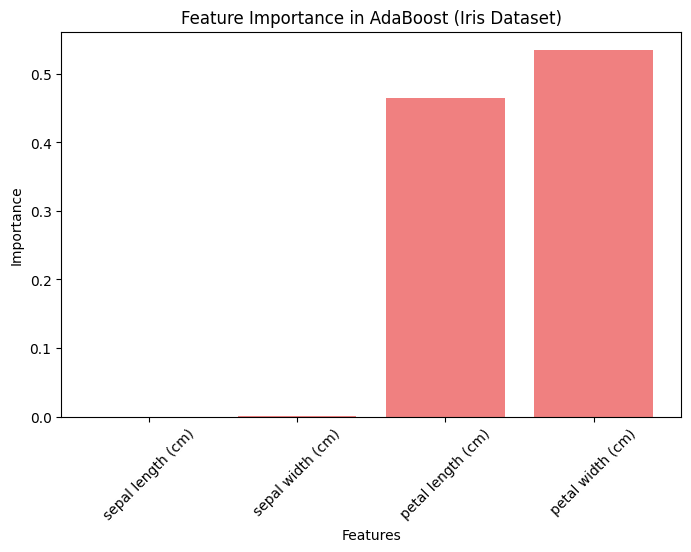

Model Accuracy: 100.00%

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC AUC Score: 1.00


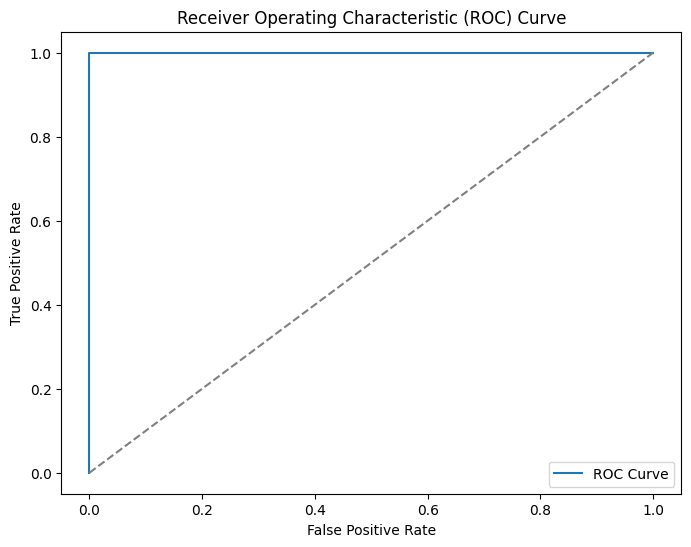

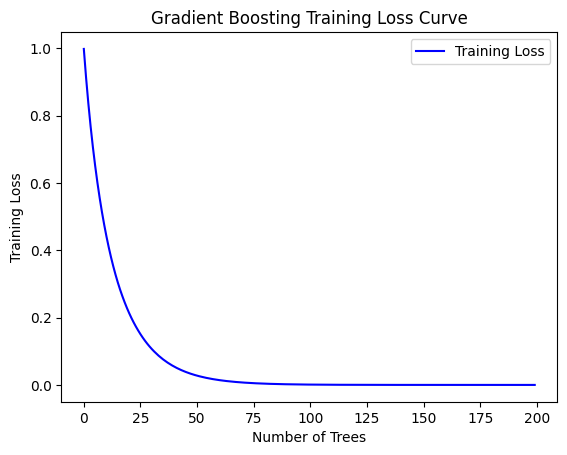

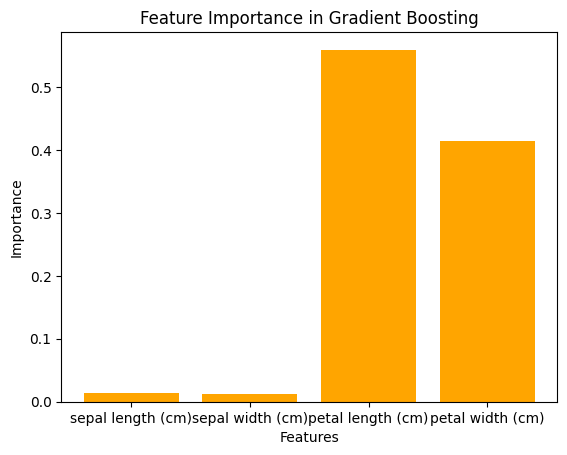

In [19]:
#------8a--
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load the Iris dataset
31
iris = load_iris()
X, y = iris.data, iris.target
# Split the dataset with different test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)  #

# Create AdaBoost model with Decision Tree as base estimator
boosting_model = AdaBoostClassifier(
estimator=DecisionTreeClassifier(max_depth=3),  # Increased tree depth
n_estimators=75,  # Reduced number of estimators
learning_rate=0.8,  # Changed learning rate to 0.8
random_state=123
)
# Train the model
boosting_model.fit(X_train, y_train)
# Predict on test data
y_pred = boosting_model.predict(X_test)
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(iris.feature_names, boosting_model.feature_importances_, color='lightcoral')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in AdaBoost (Iris Dataset)")
plt.xticks(rotation=45)
plt.show()

#------8b--
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
data = load_iris()
34
X, y = data.data, data.target
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create Gradient Boosting model with different parameters
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5,
random_state=42)
# Train the model
gb_clf.fit(X_train, y_train)
# Predict on test data
y_pred = gb_clf.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# ROC AUC Score (for multiclass classification)
roc_auc = roc_auc_score(y_test, gb_clf.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")
# ROC Curve (Multiclass)
fpr, tpr, _ = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Plot the training loss curve
plt.plot(np.arange(len(gb_clf.train_score_)), gb_clf.train_score_, label="Training Loss",
color='blue')

plt.xlabel("Number of Trees")
plt.ylabel("Training Loss")
plt.title("Gradient Boosting Training Loss Curve")
plt.legend()
plt.show()
# Feature Importance Plot
plt.bar(data.feature_names, gb_clf.feature_importances_, color='orange')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Gradient Boosting")
plt.show()